## 线性回归求解

#### **损失函数**

**1. 均方误差(MSE)**

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$

均方误差特点
1. 对误差比较敏感, 因为平方项会放大较大的误差项
2. 均方误差是一个凸函数, 存在全局唯一的最小值, 平方项又使损失函数处处可导便于求解最优参数
3. 最小二乘法（最小化MSE）的解析解可通过矩阵运算直接求出

**2. 平均绝对误差(MAE)**

$$
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y_i}|
$$

平均绝对误差特点

对误差不敏感, 但对小误差的惩罚会很弱

#### 正规方程法（解析法）

正规方程法（Normal Equation）是一种用于求解线性回归最优参数的解析方法。
它基于最小二乘法，通过矩阵求解直接得到参数向量，无需迭代。

#### MSE 损失函数矩阵形式

$$
\text{MSE}=\frac{1}{n}\left\| X\boldsymbol{\beta}-\mathbf{y} \right\|^2
$$

$$
\text{MSE}=\frac{1}{n}(X\boldsymbol{\beta}-\mathbf{y})^T (X\boldsymbol{\beta}-\mathbf{y})
$$


#### 设计矩阵：

$$
X=
\begin{bmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_m \\
1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_m \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x^{(n)}_1 & x^{(n)}_2 & \cdots & x^{(n)}_m
\end{bmatrix}
$$

#### 参数向量：

$$
\boldsymbol{\beta} =
\begin{bmatrix}
\beta_0 \\ \beta_1 \\ \vdots \\ \beta_m
\end{bmatrix}
$$

#### 标签向量：

$$
\mathbf{y} =
\begin{bmatrix}
y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(n)}
\end{bmatrix}
$$


#### 对 β 求偏导并令其为 0

$$
\frac{\partial \text{MSE}}{\partial \boldsymbol{\beta}}
= \frac{2}{n} X^T (X\boldsymbol{\beta}-\mathbf{y})
$$

设偏导 = 0：

$$
X^T X \boldsymbol{\beta} = X^T \mathbf{y}
$$


#### 正规方程解（Normal Equation）

$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T \mathbf{y}
$$

#### 适用场景

特征数量较少（m 较小）

数据量不大（逆矩阵计算代价高）

不需要梯度下降的迭代过程

当特征数量很大, 正规方程速度会非常慢，此时用 **梯度下降 / SGD** 更合适。


#### **梯度下降**

假设目标函数为J(**beita**), 其中**beita**是参数向量, J(**beita**)是损失函数

参数迭代更新公式:
$$
\boldsymbol{\beta}_{t+1} = \boldsymbol{\beta}_{t} - \alpha \cdot \nabla J(\boldsymbol{\beta}_{t})
$$

- $\alpha：学习率（Learning Rate），用于控制步长$
- $\nabla J(\beta_t)：目标函数在 \beta_t 处的梯度（偏导数组成的向量）$

#### **手写梯度下降算法:**

In [81]:
import numpy as np

In [74]:
# 定义损失函数
def J(beta):
    return np.sum((X @ beta - y) ** 2, axis=0).reshape(-1, 1) / n
# 定义梯度
def gradient(beta):
    return X.T @ (X @ beta - y) / n * 2

In [75]:
X = np.array([[5], [8], [10], [12], [15], [3], [7], [9], [14], [6]])    # 自变量, 每周学习时长
y = np.array([[55], [65], [70], [75], [85], [50], [60], [72], [80], [58]])  # 因变量, 数学考试成绩
# 样本数
n = X.shape[0]
# 对X进行处理, 添加一列全1
X = np.hstack([np.ones((n, 1)),  X])

In [76]:
# 初始参数
beta = np.array([[1], [1]])

In [77]:
alph = 0.01 # 学习率
epoch = 0   # 迭代次数

In [78]:
beta0 = []
beta1 = []

In [79]:
# 迭代求参数
while (np.abs(grad := gradient(beta)) > 1e-10).any() and (epoch := epoch + 1) <= 10000:
    beta0.append(beta[0][0])
    beta1.append(beta[1][0])
    if epoch % 1000 == 0:
        print(f'参数值: {beta.reshape(-1)}, 损失值: {J(beta)}')
    beta = beta - alph * grad
print(epoch)

参数值: [39.3023136   3.07685156], 损失值: [[3.66132229]]
参数值: [41.33536511  2.88177467], 损失值: [[2.98311419]]
参数值: [41.44450288  2.8713026 ], 损失值: [[2.98115978]]
参数值: [41.45036159  2.87074044], 损失值: [[2.98115414]]
参数值: [41.4506761   2.87071026], 损失值: [[2.98115413]]
参数值: [41.45069298  2.87070864], 损失值: [[2.98115413]]
参数值: [41.45069389  2.87070855], 损失值: [[2.98115413]]
参数值: [41.45069393  2.87070855], 损失值: [[2.98115413]]
8713


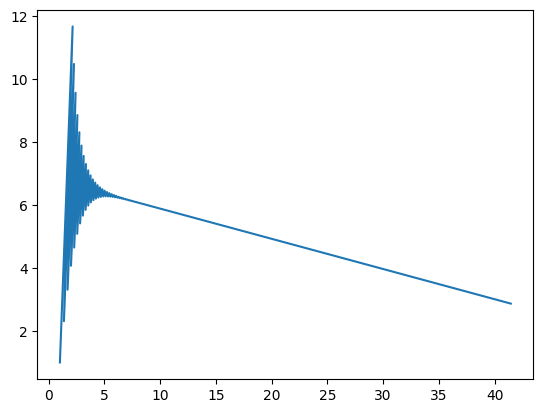

In [80]:
# 画出beta迭代图像
import matplotlib.pyplot as plt
plt.plot(beta0, beta1)
plt.show()